# Sept. Meeting plots are in this notebook

In [1]:
# import warnings
# warnings.filterwarnings("ignore")

import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys

/Users/hn/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')
import remote_sensing_core as rc
import remote_sensing_plot_core as rcp

start_time = time.time()

In [3]:
data_dir = "/Users/hn/Documents/01_research_data/" + \
           "remote_sensing/01_NDVI_TS/70_Cloud/00_Eastern_WA_withYear/2Years/"

param_dir = "/Users/hn/Documents/00_GitHub/Ag/remote_sensing/parameters/"

In [4]:
####################################################################################
###
###      Parameters                   
###
####################################################################################

SF_year = 2017
indeks = "EVI"

In [5]:
f_name = "Eastern_WA_" + str(SF_year) + "_70cloud_selectors.csv"
a_df = pd.read_csv(data_dir + f_name, low_memory=False)

##################################################################
##################################################################
####
####  plots has to be exact. So, we need 
####  to filter out NASS, and filter by last survey date
####
##################################################################
##################################################################

a_df = a_df[a_df['county']== "Grant"] # Filter Grant
# a_df = rc.filter_out_NASS(a_df) # Toss NASS
# a_df = rc.filter_by_lastSurvey(a_df, year = SF_year) # filter by last survey date
a_df['SF_year'] = SF_year

In [48]:
# choose negative EVI
negativeEVIs = a_df[a_df.EVI < -0.1].copy()
negativeEVIs = negativeEVIs[negativeEVIs.EVI > -1].copy()

negativeEVIs = negativeEVIs[negativeEVIs.doy > 300].copy()
negativeEVIs = negativeEVIs[negativeEVIs.image_year > 2016].copy()


In [49]:
negativeEVIs.head(10)

,ID,Acres,BSI,county,CropGrp,CropTyp,DataSrc,doy,EVI,ExctAcr,...,Notes,PSRI,RtCrpTy,Shap_Ar,Shp_Lng,system_start_time,TRS,image_year,B8,SF_year
38432798,100013_WSDA_SF_2017,130.0,-0.129802,Grant,Hay/Silage,alfalfa/grass hay,wsda,304.0,-0.161077,130.116364,...,NaN,-0.002958,Alfalfa Hay,526562.241875,3314.433112,1.509563e+12,T19R23E1,2017.0,0.275891,2017
38433043,109404_WSDA_SF_2017,50.0,0.203250,Grant,Hay/Silage,alfalfa hay,wsda,304.0,-0.116650,50.400083,...,NaN,0.409007,Wheat,203961.898232,1928.706106,1.509563e+12,T20R23E36,2017.0,0.202100,2017
38438113,102797_WSDA_SF_2017,33.0,-0.100305,Grant,Hay/Silage,timothy,wsda,304.0,-0.249880,32.651338,...,NaN,-0.011599,"Corn, Sweet",132135.277213,1495.573195,1.509563e+12,T19R25E5,2017.0,0.259472,2017
38438211,105021_WSDA_SF_2017,35.0,-0.101255,Grant,Hay/Silage,alfalfa hay,wsda,304.0,-0.120760,35.170975,...,NaN,-0.001103,Potato,142331.887876,1369.077818,1.509563e+12,T19R25E6,2017.0,0.286872,2017
38438267,104921_WSDA_SF_2017,143.0,-0.099804,Grant,Cereal Grain,"corn, field",wsda,304.0,-0.659998,143.419587,...,NaN,0.022929,Onion,580398.477570,2849.096966,1.509563e+12,T19R24E11,2017.0,0.269470,2017
38438400,109317_WSDA_SF_2017,122.0,-0.030448,Grant,Vegetable,potato,wsda,304.0,-0.112918,122.082986,...,NaN,0.049113,Timothy,494052.317220,2922.430377,1.509563e+12,T20R25E35,2017.0,0.288114,2017
38439762,101695_WSDA_SF_2017,18.0,-0.107249,Grant,Vegetable,"bean, dry",wsda,304.0,-0.376411,18.094709,...,NaN,0.001674,"Nursery, Orchard/Vineyard",73226.687824,1193.016587,1.509563e+12,T20R24E21,2017.0,0.368777,2017
38439811,107628_WSDA_SF_2017,66.0,-0.084542,Grant,Cereal Grain,"corn, field",wsda,304.0,-0.534225,66.155299,...,NaN,0.031311,Potato,267720.997500,2112.047397,1.509563e+12,T20R24E21,2017.0,0.324115,2017
38440581,99405_WSDA_SF_2017,70.0,-0.069765,Grant,Hay/Silage,alfalfa hay,wsda,304.0,-0.427304,70.189088,...,NaN,0.052901,Wheat,284045.160137,2207.559208,1.509563e+12,T20R26E25,2017.0,0.249793,2017
38440729,98326_WSDA_SF_2017,138.0,0.084933,Grant,Vegetable,"bean, dry",wsda,304.0,-0.101457,137.558166,...,NaN,0.253016,"Corn, Field",556678.145813,3024.206438,1.509563e+12,T20R26E29,2017.0,0.226995,2017


# Pipeline

   
   1. Read the data
   2. Remove outlliers and jumps
   3. Regularize
   4. Fill Gaps
   5. Smoothen
   6. Find peaks and troughs 
   7. Find SOS and EOS using NDVI ratio of White and TIMESAT.

## 1. Read the data 
(Extract one field)

In [89]:
one_field = a_df[a_df.ID == "105021_WSDA_SF_2017"].copy() # 100426_WSDA_SF_2017

# one_field = one_field[one_field.image_year == 2017].copy()

#
# sort the time series
#
one_field.sort_values(by=['image_year', 'doy'], inplace=True)

#
# reset the damn index to avoid problems if loc and iloc.
#
one_field.reset_index(drop=True, inplace=True)


## add proper date columns to make plotting easier 

In [90]:
one_field = one_field[one_field['EVI'].notna()]

one_field['human_system_start_time'] = pd.to_datetime(one_field['image_year'] * 1000 + \
                                                      one_field['doy'], format='%Y%j')

one_field['Date'] = pd.to_datetime(one_field.human_system_start_time.values).values

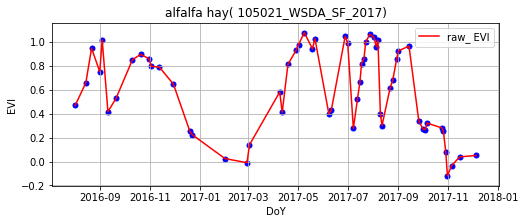

In [91]:
fig, ax = plt.subplots(figsize=(8,3));
plot_title = one_field.CropTyp.unique()[0] + "( " + one_field.ID.unique()[0] + ")"

ax.plot(one_field['Date'], one_field['EVI'], c='r', label="raw_ EVI")
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=25, c='b')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)

## 2. Remove outliers and jumps

#### 2a. Remove outliers

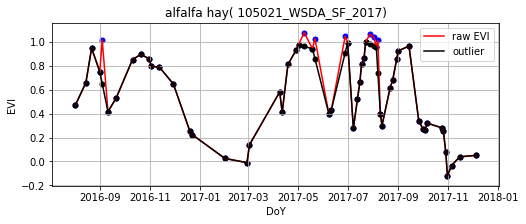

In [92]:
cleaned_field = rc.interpolate_outliers_EVI_NDVI(outlier_input = one_field , given_col = indeks)
fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0] + "( " + cleaned_field.ID.unique()[0] + ")"

ax.plot(one_field['Date'], one_field['EVI'], c='r', label="raw EVI")
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=25, c='b')

ax.plot(cleaned_field['Date'], cleaned_field['EVI'], c='k', label="outlier")
ax.scatter(cleaned_field['Date'], cleaned_field['EVI'], marker='o', s=25, c='k')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)

In [93]:
outlierRemoved_EVI_values = cleaned_field['EVI']
outlierRemoved_EVI_time = cleaned_field['Date']

#### 2b. Remove Jumps

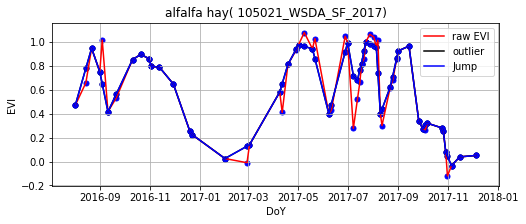

In [94]:
cleaned_field = rc.correct_big_jumps_1DaySeries(dataTMS_jumpie = cleaned_field, 
                                                give_col = indeks, 
                                                maxjump_perDay = 0.015)

outlierJumpRemoved_EVI_values = cleaned_field['EVI']
outlierJumpRemoved_EVI_time = cleaned_field['Date']

fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0] + "( " + cleaned_field.ID.unique()[0] + ")"

ax.plot(one_field['Date'], one_field['EVI'], c='r', label="raw EVI")
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=25, c='b')

ax.plot(cleaned_field['Date'], cleaned_field['EVI'], c='k', label="outlier")
ax.scatter(cleaned_field['Date'], cleaned_field['EVI'], marker='o', s=25, c='k')

ax.plot(cleaned_field['Date'], cleaned_field['EVI'], c = 'b', label="Jump")
ax.scatter(cleaned_field['Date'], cleaned_field['EVI'], marker='o', s=25, c='b')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)

### 3. Regularize

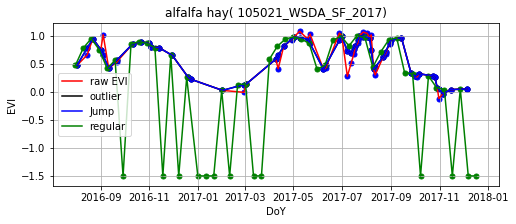

In [95]:
regular_window_size = 10 
regularized_TS = rc.regularize_movingWindow_windowSteps_2Yrs(one_field_df = cleaned_field, \
                                                             SF_yr = SF_year, \
                                                             veg_idxs = indeks, \
                                                             window_size = regular_window_size)

regularized_TS['human_system_start_time'] = pd.to_datetime(regularized_TS['image_year'] * 1000 + \
                                                           regularized_TS['doy'], format='%Y%j')

regularized_TS['Date'] = pd.to_datetime(regularized_TS.human_system_start_time.values).values


fig, ax = plt.subplots(figsize=(8,3));
plot_title = regularized_TS.CropTyp.unique()[0] + "( " + regularized_TS.ID.unique()[0] + ")"


ax.plot(one_field['Date'], one_field['EVI'], c='r', label="raw EVI")
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=25, c='b')

ax.plot(cleaned_field['Date'], cleaned_field['EVI'], c='k', label="outlier")
ax.scatter(cleaned_field['Date'], cleaned_field['EVI'], marker='o', s=25, c='k')

ax.plot(cleaned_field['Date'], cleaned_field['EVI'], c = 'b', label="Jump")
ax.scatter(cleaned_field['Date'], cleaned_field['EVI'], marker='o', s=25, c='b')

ax.plot(regularized_TS['Date'], regularized_TS['EVI'], c = 'g', label="regular")
ax.scatter(regularized_TS['Date'], regularized_TS['EVI'], marker='o', s=25, c='g')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)

In [96]:
regularized_EVI_values = regularized_TS['EVI']
regularized_EVI_time = regularized_TS['Date']

### 4. Fill Gaps

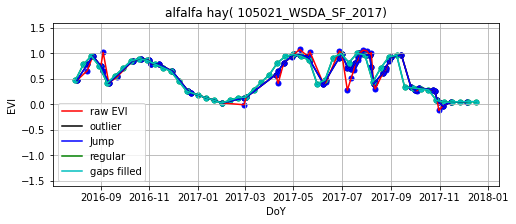

In [97]:
regularized_TS = rc.fill_theGap_linearLine(regular_TS = regularized_TS, V_idx = indeks, SF_year = 2017)

regularized_TS['human_system_start_time'] = pd.to_datetime(regularized_TS['image_year'] * 1000 + \
                                                           regularized_TS['doy'], format='%Y%j')

regularized_TS['Date'] = pd.to_datetime(regularized_TS.human_system_start_time.values).values


fig, ax = plt.subplots(figsize=(8,3));
plot_title = regularized_TS.CropTyp.unique()[0] + "( " + regularized_TS.ID.unique()[0] + ")"


ax.plot(one_field['Date'], one_field['EVI'], c='r', label="raw EVI")
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=25, c='b')

ax.plot(cleaned_field['Date'], cleaned_field['EVI'], c='k', label="outlier")
ax.scatter(cleaned_field['Date'], cleaned_field['EVI'], marker='o', s=25, c='k')

ax.plot(cleaned_field['Date'], cleaned_field['EVI'], c = 'b', label="Jump")
ax.scatter(cleaned_field['Date'], cleaned_field['EVI'], marker='o', s=25, c='b')

ax.plot(regularized_TS['Date'], regularized_TS['EVI'], c = 'g', label="regular")
ax.scatter(regularized_TS['Date'], regularized_TS['EVI'], marker='o', s=25, c='g')

ax.plot(regularized_TS['Date'], regularized_TS['EVI'], c = 'c', label="gaps filled")
ax.scatter(regularized_TS['Date'], regularized_TS['EVI'], marker='o', s=25, c='c')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.set_ylim([-1.6, 1.6])
ax.grid(True)

In [98]:
filledGaps_EVI_values = regularized_TS['EVI']
filledGaps_EVI_time = regularized_TS['Date']

# We only want to look at one year
We did it here, because our regularization function is written for 1.5 year 

### 5. Smoothen
This is done inside the plotting function. 
Maybe we can prodduce CSV fine for these and save in on the disk for further use.

## 6. Find peaks and troughs

### (a) MATLAB code converted

In [99]:
# crr_fld = clean_regularized_TS.copy()
# idx = indeks
# SG_params = [5, 1]
# SFYr = 2017
# ax = [0, 0]
# deltA = 0.4

In [100]:
clean_regularized_TS = regularized_TS.copy()

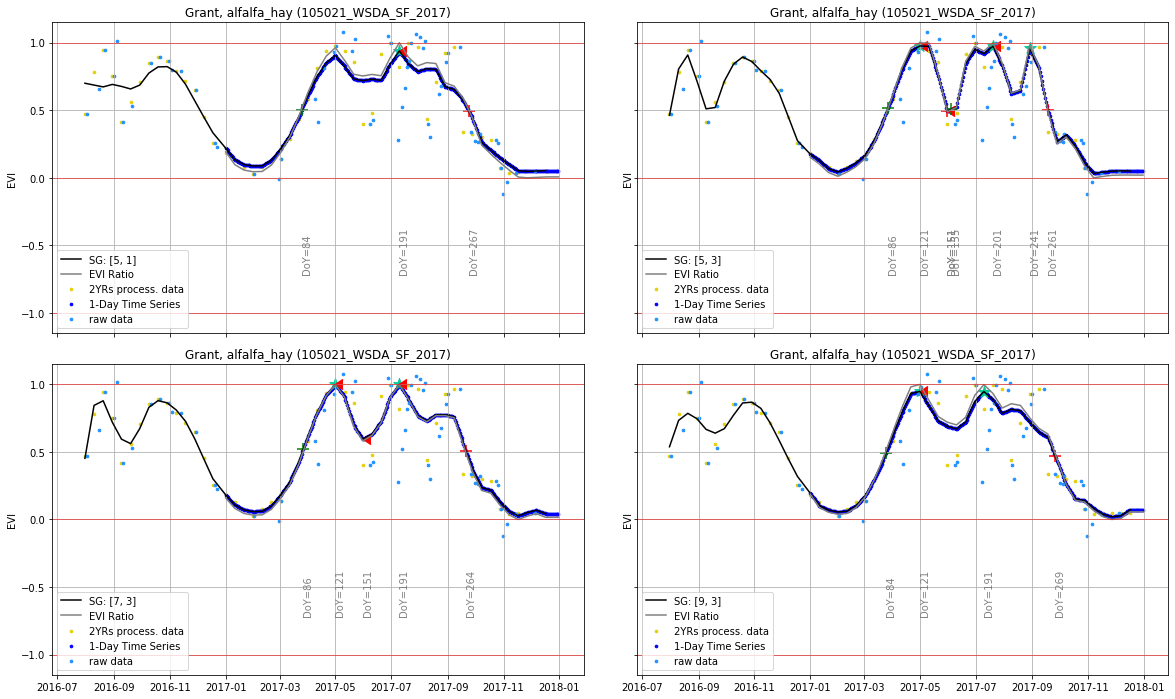

In [101]:
fig, axs = plt.subplots(2, 2, figsize=(20,12),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2), (ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True);

rcp.SG_1yr_panels_clean_sciPy_My_Peaks_SOS_fineGranularity(twoYears_raw = one_field, 
                                                           twoYears_regular = clean_regularized_TS, 
                                                           idx=indeks, SG_params=[5, 1], 
                                                           SFYr=SF_year, ax=ax1, deltA=0.4);

rcp.SG_1yr_panels_clean_sciPy_My_Peaks_SOS_fineGranularity(twoYears_raw = one_field, 
                                                           twoYears_regular = clean_regularized_TS, 
                                                           idx=indeks, 
                                                           SG_params=[5, 3], 
                                                           SFYr=SF_year, ax=ax2, deltA=0.4); 

rcp.SG_1yr_panels_clean_sciPy_My_Peaks_SOS_fineGranularity(twoYears_raw = one_field, 
                                                           twoYears_regular = clean_regularized_TS, 
                                                           idx=indeks, SG_params=[7, 3], 
                                                           SFYr=SF_year, ax=ax3, deltA=0.4);

rcp.SG_1yr_panels_clean_sciPy_My_Peaks_SOS_fineGranularity(twoYears_raw = one_field, 
                                                           twoYears_regular = clean_regularized_TS, 
                                                           idx=indeks, SG_params=[9, 3],
                                                           SFYr=SF_year, ax=ax4, deltA=0.4)


plot_path = "/Users/hn/Desktop/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

# fig_name = plot_path + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'
# plt.savefig(fname = fig_name, dpi=250, bbox_inches='tight')

# Plots for Sept Meeting

# plot raw

In [ ]:
fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0]

ax.plot(raw_EVI_time[14:], 
        raw_EVI_values[14:],
        linewidth=.5, 
        c='#E4D00A', 
        label="1 raw EVI")

ax.scatter(raw_EVI_time[14:], 
           raw_EVI_values[14:], 
           marker='o', 
           s=15, 
           c='#E4D00A')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)
ax.set_ylim([-1.2, 1.2])

ax.axhline(0 , color = 'r', linewidth=.5)
ax.axhline(1 , color = 'r', linewidth=.5)
ax.axhline(-1, color = 'r', linewidth=.5)

######
plot_path = "/Users/hn/Desktop/remote_meeting/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

fig_name = plot_path + "00_raw_" + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'
plt.savefig(fname = fig_name, dpi=600, bbox_inches='tight')

# plot outlier removed, jump removed

In [ ]:
# outlierRemoved_EVI_values 
# outlierRemoved_EVI_time

# outlierJumpRemoved_EVI_values
# outlierJumpRemoved_EVI_time

fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0]

#
#  raw
#
ax.plot(raw_EVI_time[14:], 
        raw_EVI_values[14:], 
        linewidth=.5, 
        c='#E4D00A', 
        label="1 raw EVI")

ax.scatter(raw_EVI_time[14:], 
           raw_EVI_values[14:],
           marker='o', 
           s=15, 
           c='#E4D00A')

#
#  outlier removed
#
ax.plot(outlierRemoved_EVI_time[14:], 
        outlierRemoved_EVI_values[14:], 
        linewidth=.5, 
        c='g', 
        label="2 no outlier")

ax.scatter(outlierRemoved_EVI_time[14:], 
           outlierRemoved_EVI_values[14:], 
           marker='o', 
           s=10,
           c='g')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)
ax.set_ylim([-1.2, 1.2])

ax.axhline(0 , color = 'r', linewidth=.5)
ax.axhline(1 , color = 'r', linewidth=.5)
ax.axhline(-1, color = 'r', linewidth=.5)

######
plot_path = "/Users/hn/Desktop/remote_meeting/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

fig_name = plot_path + "01_raw_noOutlier_" + \
           county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'

plt.savefig(fname = fig_name, dpi=600, bbox_inches='tight')

In [ ]:
# outlierRemoved_EVI_values 
# outlierRemoved_EVI_time

# outlierJumpRemoved_EVI_values
# outlierJumpRemoved_EVI_time

fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0]

#
#  raw
#
ax.plot(raw_EVI_time[14:], 
        raw_EVI_values[14:], 
        linewidth=.5, 
        c='#E4D00A', 
        label="1 raw EVI")

ax.scatter(raw_EVI_time[14:], 
           raw_EVI_values[14:],
           marker='o', 
           s=15, 
           c='#E4D00A')

#
#  outlier removed
#
ax.plot(outlierRemoved_EVI_time[14:], 
        outlierRemoved_EVI_values[14:], 
        linewidth=.5, 
        c='g', 
        label="2 no outlier")

ax.scatter(outlierRemoved_EVI_time[14:], 
           outlierRemoved_EVI_values[14:], 
           marker='o', 
           s=10,
           c='g')

#
#  jump removed
#
ax.plot(outlierJumpRemoved_EVI_time[14:], 
        outlierJumpRemoved_EVI_values[14:], 
        linewidth=.5, 
        c='c', 
        label="3 no jump")

ax.scatter(outlierJumpRemoved_EVI_time[14:], 
           outlierJumpRemoved_EVI_values[14:], 
           marker='o', 
           s=10,
           c='c')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)
ax.set_ylim([-1.2, 1.2])

ax.axhline(0, color = 'r', linewidth=.5); 
ax.axhline(1, color = 'r', linewidth=.5)
ax.axhline(-1, color = 'r', linewidth=.5)

######
plot_path = "/Users/hn/Desktop/remote_meeting/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

fig_name = plot_path + "02_raw_Nojump_" + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'
plt.savefig(fname = fig_name, dpi=600, bbox_inches='tight')

# plot regularized and gaps filled

In [ ]:
# regularized_EVI_values
# regularized_EVI_time

# filledGaps_EVI_values
# filledGaps_EVI_time

# outlierRemoved_EVI_values 
# outlierRemoved_EVI_time

# outlierJumpRemoved_EVI_values
# outlierJumpRemoved_EVI_time

fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0]

#
#  raw
#
ax.plot(raw_EVI_time[14:], 
        raw_EVI_values[14:], 
        linewidth=.5, 
        c='#E4D00A', 
        label="1 raw EVI")

ax.scatter(raw_EVI_time[14:], 
           raw_EVI_values[14:],
           marker='o', 
           s=15, 
           c='#E4D00A')

#
#  outlier removed
#
ax.plot(outlierRemoved_EVI_time[14:], 
        outlierRemoved_EVI_values[14:], 
        linewidth=.5, 
        c='g', 
        label="2 no outlier")

ax.scatter(outlierRemoved_EVI_time[14:], 
           outlierRemoved_EVI_values[14:], 
           marker='o', 
           s=10,
           c='g')

#
#  jump removed
#
ax.plot(outlierJumpRemoved_EVI_time[14:], 
        outlierJumpRemoved_EVI_values[14:], 
        linewidth=.5, 
        c='c', 
        label="3 no jump")

ax.scatter(outlierJumpRemoved_EVI_time[14:], 
           outlierJumpRemoved_EVI_values[14:], 
           marker='o', 
           s=10,
           c='c')

#
#  regularized
#
ax.plot(filledGaps_EVI_time[14:], 
        filledGaps_EVI_values[14:], 
        linewidth=.5, 
        c='m', 
        label="4 equidistant")

ax.scatter(filledGaps_EVI_time[14:], 
           filledGaps_EVI_values[14:], 
           marker='o', 
           s=10,
           c='m')


ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)
ax.set_ylim([-1.2, 1.2])

ax.axhline(0, color = 'r', linewidth=.5); 
ax.axhline(1, color = 'r', linewidth=.5)
ax.axhline(-1, color = 'r', linewidth=.5)

######
plot_path = "/Users/hn/Desktop/remote_meeting/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

fig_name = plot_path + "03_regularized_" + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'
plt.savefig(fname = fig_name, dpi=600, bbox_inches='tight')

In [ ]:
# regularized_EVI_values
# regularized_EVI_time

# filledGaps_EVI_values
# filledGaps_EVI_time

# outlierRemoved_EVI_values 
# outlierRemoved_EVI_time

# outlierJumpRemoved_EVI_values
# outlierJumpRemoved_EVI_time

fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0]

#
#  raw
#
ax.plot(raw_EVI_time[14:], 
        raw_EVI_values[14:], 
        linewidth=.5, 
        c='#E4D00A', 
        label="1 raw EVI")

ax.scatter(raw_EVI_time[14:], 
           raw_EVI_values[14:],
           marker='o', 
           s=15, 
           c='#E4D00A')
#
#  regularized
#
ax.plot(filledGaps_EVI_time[14:], 
        filledGaps_EVI_values[14:], 
        linewidth=.5, 
        c='m', 
        label="4 equidistant")

ax.scatter(filledGaps_EVI_time[14:], 
           filledGaps_EVI_values[14:], 
           marker='o', 
           s=10,
           c='m')


ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)
ax.set_ylim([-1.2, 1.2])

ax.axhline(0, color = 'r', linewidth=.5); 
ax.axhline(1, color = 'r', linewidth=.5)
ax.axhline(-1, color = 'r', linewidth=.5)

######
plot_path = "/Users/hn/Desktop/remote_meeting/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

fig_name = plot_path + "04_Cleanregularized_" + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'
plt.savefig(fname = fig_name, dpi=600, bbox_inches='tight')

In [ ]:
y = clean_regularized_TS['EVI'].copy()
SG_pred_53 = scipy.signal.savgol_filter(y, window_length= 5, polyorder=3)

In [ ]:
# regularized_EVI_values
# regularized_EVI_time

# filledGaps_EVI_values
# filledGaps_EVI_time

# outlierRemoved_EVI_values 
# outlierRemoved_EVI_time

# outlierJumpRemoved_EVI_values
# outlierJumpRemoved_EVI_time

fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0]

#
#  raw
#
ax.plot(raw_EVI_time[14:], 
        raw_EVI_values[14:], 
        linewidth=.5, 
        c='#E4D00A', 
        label="1 raw EVI")

ax.scatter(raw_EVI_time[14:], 
           raw_EVI_values[14:],
           marker='o', 
           s=15, 
           c='#E4D00A')
#
#  regularized
#
ax.plot(filledGaps_EVI_time[14:], 
        filledGaps_EVI_values[14:], 
        linewidth=.5, 
        c='m', 
        label="4 equidistant")

ax.scatter(filledGaps_EVI_time[14:], 
           filledGaps_EVI_values[14:], 
           marker='o', 
           s=10,
           c='m')

#
#  Smoothed
#
ax.plot(clean_regularized_TS['Date'], 
        SG_pred_53, 
        linewidth=.5, 
        c='k', 
        label="5 SG(5, 3)")

ax.scatter(clean_regularized_TS['Date'], 
           SG_pred_53,
           marker='o', 
           s=10,
           c='k')


ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)
ax.set_ylim([-1.2, 1.2])

ax.axhline(0, color = 'r', linewidth=.5); 
ax.axhline(1, color = 'r', linewidth=.5)
ax.axhline(-1, color = 'r', linewidth=.5)

######
plot_path = "/Users/hn/Desktop/remote_meeting/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

fig_name = plot_path + "05_smooth_" + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'
plt.savefig(fname = fig_name, dpi=600, bbox_inches='tight')

In [ ]:
# regularized_EVI_values
# regularized_EVI_time

# filledGaps_EVI_values
# filledGaps_EVI_time

# outlierRemoved_EVI_values 
# outlierRemoved_EVI_time

# outlierJumpRemoved_EVI_values
# outlierJumpRemoved_EVI_time

fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0]

#
#  raw
#
ax.plot(raw_EVI_time[14:], 
        raw_EVI_values[14:], 
        linewidth=.5, 
        c='#E4D00A', 
        label="1 raw EVI")

ax.scatter(raw_EVI_time[14:], 
           raw_EVI_values[14:],
           marker='o', 
           s=15, 
           c='#E4D00A')

#
#  outlier removed
#
ax.plot(outlierRemoved_EVI_time[14:], 
        outlierRemoved_EVI_values[14:], 
        linewidth=.5, 
        c='g', 
        label="2 no outlier")

ax.scatter(outlierRemoved_EVI_time[14:], 
           outlierRemoved_EVI_values[14:], 
           marker='o', 
           s=10,
           c='g')

#
#  jump removed
#
ax.plot(outlierJumpRemoved_EVI_time[14:], 
        outlierJumpRemoved_EVI_values[14:], 
        linewidth=.5, 
        c='c', 
        label="3 no jump")

ax.scatter(outlierJumpRemoved_EVI_time[14:], 
           outlierJumpRemoved_EVI_values[14:], 
           marker='o', 
           s=10,
           c='c')

#
#  regularized
#
ax.plot(filledGaps_EVI_time[14:], 
        filledGaps_EVI_values[14:], 
        linewidth=.5, 
        c='m', 
        label="4 equidistant")

ax.scatter(filledGaps_EVI_time[14:], 
           filledGaps_EVI_values[14:], 
           marker='o', 
           s=10,
           c='m')

#
#  Smoothed
#
ax.plot(clean_regularized_TS['Date'], 
        SG_pred_53, 
        linewidth=.5, 
        c='k', 
        label="5 SG(5, 3)")

ax.scatter(clean_regularized_TS['Date'], 
           SG_pred_53,
           marker='o', 
           s=10,
           c='k')


ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)
ax.set_ylim([-1.2, 1.2])

ax.axhline(0, color = 'r', linewidth=.5); 
ax.axhline(1, color = 'r', linewidth=.5)
ax.axhline(-1, color = 'r', linewidth=.5)

######
plot_path = "/Users/hn/Desktop/remote_meeting/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

fig_name = plot_path + "06_allSteps_" + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'
plt.savefig(fname = fig_name, dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(8,3));
plot_title = cleaned_field.CropTyp.unique()[0]

#
#  raw
#
# ax.plot(raw_EVI_time[14:], 
#         raw_EVI_values[14:], 
#         linewidth=.5, 
#         c='#E4D00A', 
#         label="1 raw EVI")

ax.scatter(raw_EVI_time[14:], 
           raw_EVI_values[14:],
           marker='o', 
           s=15, 
           c='#E4D00A')

#
#  Smoothed
#
ax.plot(clean_regularized_TS['Date'], 
        SG_pred_53, 
        linewidth=.5, 
        c='k', 
        label="5 SG(5, 3)")

ax.scatter(clean_regularized_TS['Date'], 
           SG_pred_53,
           marker='o', 
           s=10,
           c='k')

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel='EVI')
ax.legend(loc="best");
ax.grid(True)
ax.set_ylim([-1.2, 1.2])

ax.axhline(0, color = 'r', linewidth=.5); 
ax.axhline(1, color = 'r', linewidth=.5)
ax.axhline(-1, color = 'r', linewidth=.5)

######
plot_path = "/Users/hn/Desktop/remote_meeting/"
plant = clean_regularized_TS.CropTyp.unique()[0]
county = clean_regularized_TS.county.unique()[0]
ID = clean_regularized_TS.ID.unique()[0]

fig_name = plot_path + "07_rawSmooth_" + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + ID + '.png'
plt.savefig(fname = fig_name, dpi=600, bbox_inches='tight')

In [ ]:
SG_params = 51
print (SG_params % 10 )
int(SG_params / 10)

In [ ]:
"30_cloud_max".split("_")[0]